In [58]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt

In [3]:
api = wandb.Api()
entity, project = "sashalikesplanes", "ModelReplicate"
runs = api.runs(entity + '/' + project)

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ········


wandb: Appending key for api.wandb.ai to your netrc file: /Users/sasha/.netrc


In [36]:
runs[4].sweep.name

'SI, all vars, random labels'

In [35]:
runs[4].history()['accuracy'].max()

0.33629560470581055

In [38]:
best_accuracy, exp_type = [], []
for run in runs:
    try:
        best_accuracy.append(run.history()['accuracy'].max())
        exp_type.append(run.sweep.name)
    except KeyError:
        print("run has no accuracy")

run has no accuracy


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy


In [39]:
runs_df = pd.DataFrame({
    "exp_type": exp_type,
    "accuracy": best_accuracy,
})

In [49]:
dt_runs_df = runs_df[runs_df.exp_type.isin(['DI, e, u, x, dxdt','DI, e, u, x, dudt', 'DI, e, u, x, dedt','DI, e, u, x, dedt, dudt, dxdt', 'SI, e, u, x, dxdt','SI, e, u, x, dudt', 'SI, e, u, x, dedt, dudt, dxdt','SI, e, u, x, dedt', 'DI, e, u, x', 'SI, e, u, x'])]

In [69]:
exp_names_DI = ['DI, e, u, x',
 'DI, e, u, x, dedt',
 'DI, e, u, x, dudt',
 'DI, e, u, x, dxdt',
 'DI, e, u, x, dedt, dudt, dxdt']
exp_names_SI = [
 'SI, e, u, x',
 'SI, e, u, x, dedt',
 'SI, e, u, x, dudt',
 'SI, e, u, x, dxdt',
 'SI, e, u, x, dedt, dudt, dxdt',]

In [70]:
accuracies_per_exp_DI = [dt_runs_df[dt_runs_df.exp_type == exp].accuracy.to_numpy() for exp in exp_names_DI]
accuracies_per_exp_SI = [dt_runs_df[dt_runs_df.exp_type == exp].accuracy.to_numpy() for exp in exp_names_SI]

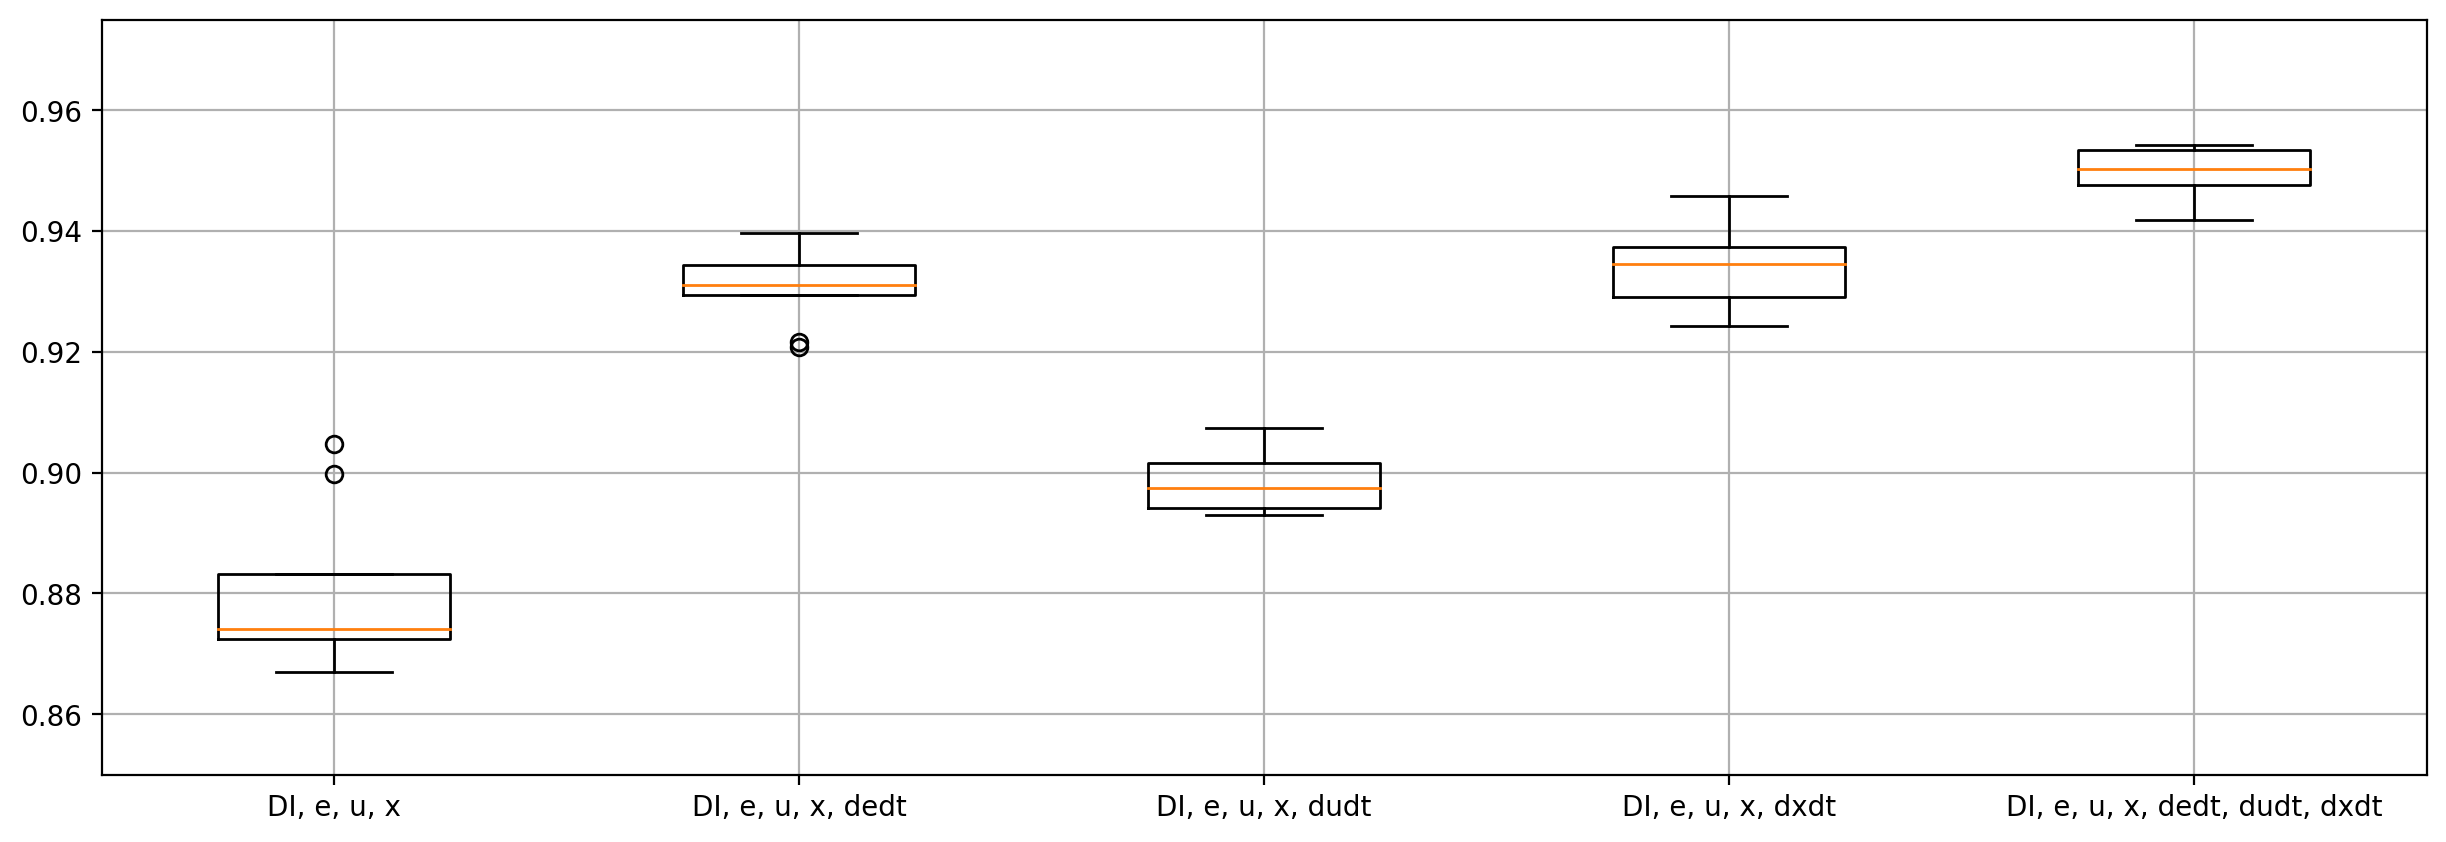

In [81]:
plt.boxplot(accuracies_per_exp_DI, labels=exp_names_DI)
plt.ylim(0.85, 0.975)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(15,5)
fig.set_dpi(200)

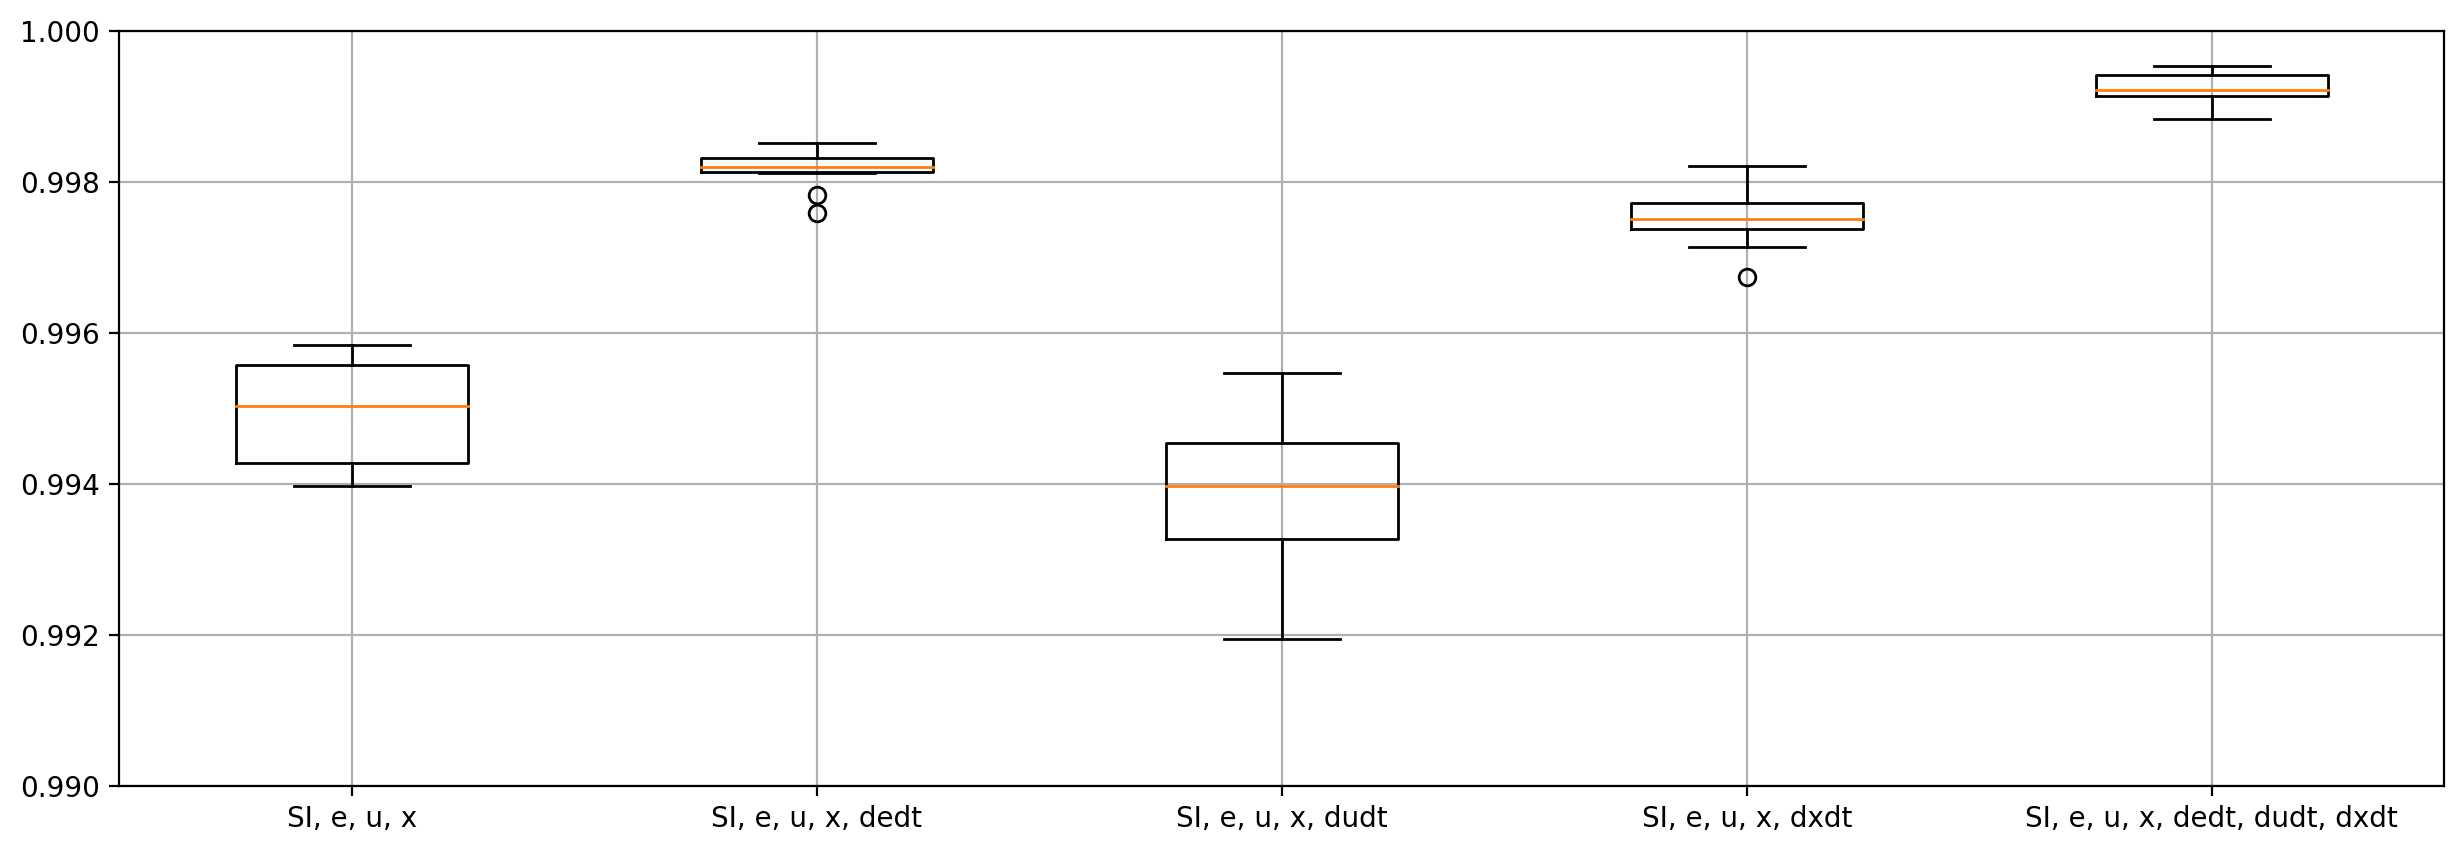

In [85]:
plt.boxplot(accuracies_per_exp_SI, labels=exp_names_SI)
plt.ylim(0.99, 1)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(15,5)
fig.set_dpi(200)